# Notebook 01: Basic ELM Usage and Core Implementation

This notebook demonstrates the fundamental concepts and usage of Extreme Learning Machines (ELM) as implemented in this project. We'll cover:

1. **Basic ELM Concepts** - Understanding the theory behind ELM
2. **Core ELM Implementation** - Using the base ELM class
3. **Activation Functions** - Different activation functions and their effects
4. **Regularization** - Ridge regression and regularization parameters
5. **Incremental ELM** - I-ELM for dynamic network growth
6. **Performance Comparison** - Speed and accuracy comparisons

## Key ELM Features

- **Extremely fast training** - No iterative optimization required
- **Universal approximation** - Theoretical guarantees for function approximation
- **Minimal hyperparameters** - Only hidden neurons and regularization
- **Stable training** - No gradient explosion or vanishing gradients


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression, make_classification
from sklearn.model_selection import train_test_split

# Import our ELM implementations
import sys
sys.path.append('../src')

from elm.models.core.elm_base import ELM, ELMClassifier
from elm.models.core.elm_incremental import ELMIncremental

# Set random seed for reproducibility
np.random.seed(42)

print("All imports successful!")
print(f"ELM version: {ELM.__module__}")
print(f"IncrementalELM version: {ELMIncremental.__module__}")


All imports successful!
ELM version: elm.models.core.elm_base
IncrementalELM version: elm.models.core.elm_incremental


## 1. Basic ELM Concepts

### ELM Theory

Extreme Learning Machines are single hidden layer feedforward neural networks where:

1. **Input weights are randomly assigned** and never updated
2. **Output weights are computed analytically** using ridge regression
3. **No backpropagation** is required

### Mathematical Formulation

For input $X \in \mathbb{R}^{n \times d}$ and target $T \in \mathbb{R}^{n \times m}$:

1. **Hidden Layer Output**: $H = g(XW + b)$
   - $W$: Random input weights (fixed)
   - $b$: Random biases (fixed)  
   - $g$: Activation function

2. **Output Weights**: $\beta = (H^T H + C \cdot I)^{-1} H^T T$
   - $C$: Regularization parameter
   - $I$: Identity matrix

3. **Prediction**: $\hat{Y} = H \beta$

### Key Advantages

- **Extremely fast training** - O(n²) complexity vs O(n³) for iterative methods
- **No local minima** - Convex optimization problem
- **Universal approximation** - Can approximate any continuous function
- **Minimal hyperparameters** - Only hidden neurons and regularization


Training data shape: X=(800, 10), y=(800,)
Test data shape: X=(200, 10), y=(200,)
Training time: 0.0046 seconds
Mean Squared Error: 379.2990
R² Score: 0.9775


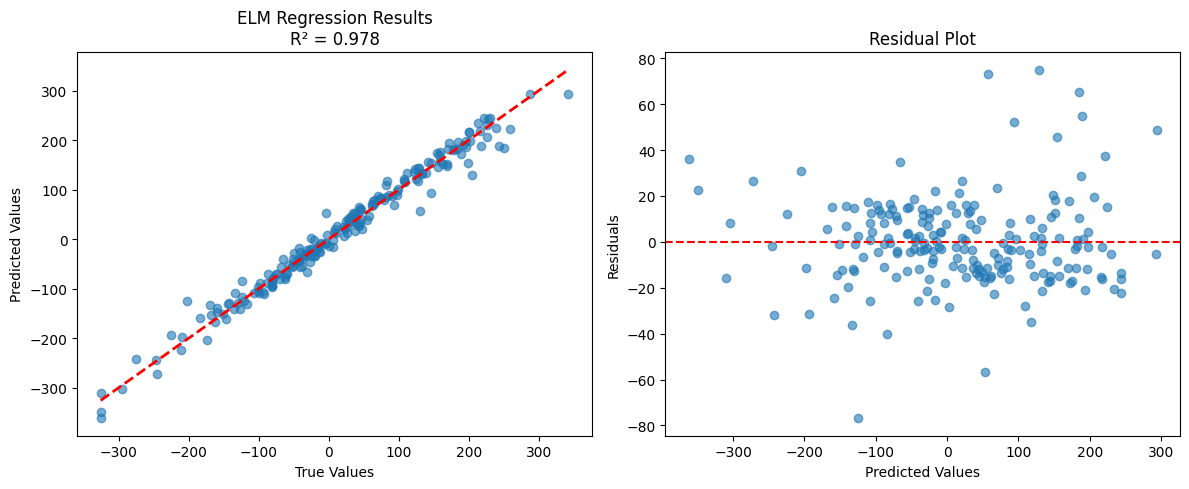

In [2]:
# 2. Basic ELM Usage - Regression Example

# Generate synthetic regression data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: X={X_train.shape}, y={y_train.shape}")
print(f"Test data shape: X={X_test.shape}, y={y_test.shape}")

# Create and train ELM
elm = ELM(
    n_hidden=100,           # Number of hidden neurons
    activation='sigmoid',   # Activation function
    random_state=42,        # For reproducibility
    scale=1.0               # Weight scaling factor
)

# Train the model
start_time = time.time()
elm.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
y_pred = elm.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Training time: {training_time:.4f} seconds")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'ELM Regression Results\nR² = {r2:.3f}')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()


Classification data shapes:
Training: X=(800, 10), y=(800,)
Test: X=(200, 10), y=(200,)
Training time: 0.0096 seconds
Accuracy: 0.8350


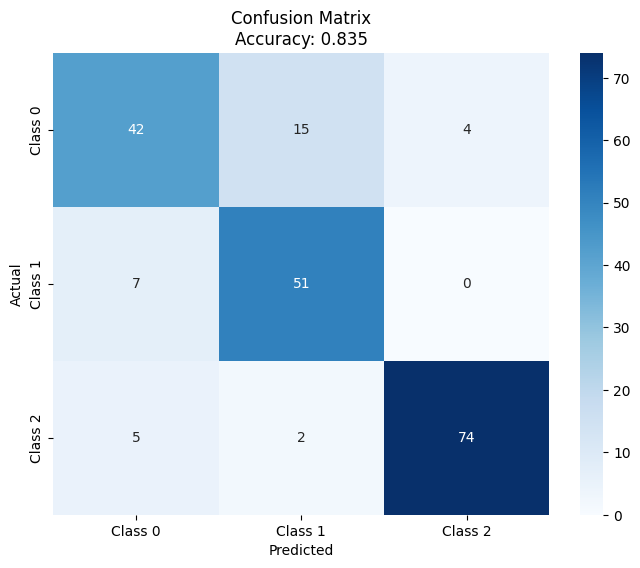

In [3]:
# 3. Classification Example

# Generate synthetic classification data
X_cls, y_cls = make_classification(n_samples=1000, n_features=10, n_classes=3, 
                                  n_clusters_per_class=1, random_state=42)

# Split data
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42)

print(f"Classification data shapes:")
print(f"Training: X={X_train_cls.shape}, y={y_train_cls.shape}")
print(f"Test: X={X_test_cls.shape}, y={y_test_cls.shape}")

# Create and train ELM for classification
elm_cls = ELMClassifier(
    n_hidden=150,
    activation='tanh',
    random_state=42,
    scale=1.0
)

# Train the model
start_time = time.time()
elm_cls.fit(X_train_cls, y_train_cls)
training_time_cls = time.time() - start_time

# Make predictions
y_pred_cls = elm_cls.predict(X_test_cls)

# Calculate accuracy
accuracy = np.mean(y_pred_cls == y_test_cls)

print(f"Training time: {training_time_cls:.4f} seconds")
print(f"Accuracy: {accuracy:.4f}")

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.3f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## 4. Activation Functions Comparison

Different activation functions can significantly impact ELM performance. Let's compare the most common ones:


   MSE: 379.2990, R²: 0.9775, Time: 0.0055s
   MSE: 863.7617, R²: 0.9488, Time: 0.0048s
   MSE: 276.0269, R²: 0.9836, Time: 0.0036s
   MSE: 8977.9180, R²: 0.4679, Time: 0.0043s


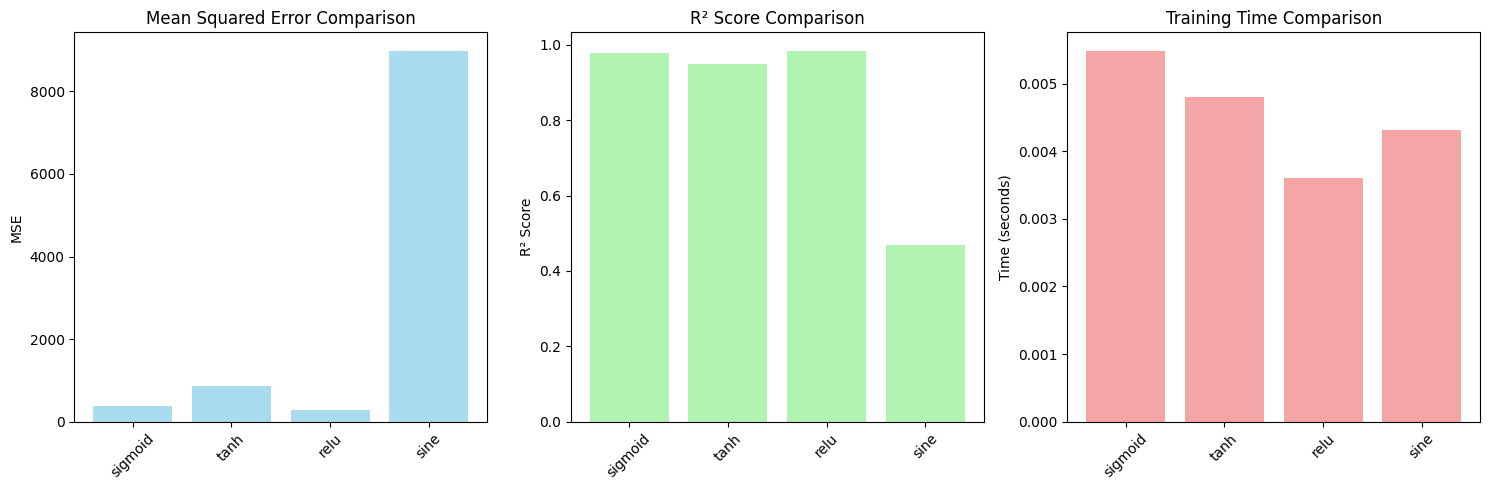

Activation Functions Comparison Summary:
Activation   MSE        R² Score   Time (s)  
sigmoid      379.2990   0.9775     0.0055    
tanh         863.7617   0.9488     0.0048    
relu         276.0269   0.9836     0.0036    
sine         8977.9180  0.4679     0.0043    


In [4]:
# Compare different activation functions
activations = ['sigmoid', 'tanh', 'relu', 'sine']
results = {}

# Use the same regression data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for activation in activations:
    
    # Create ELM with specific activation
    elm = ELM(
        n_hidden=100,
        activation=activation,
        random_state=42,
        scale=1.0
    )
    
    # Train and evaluate
    start_time = time.time()
    elm.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = elm.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[activation] = {
        'mse': mse,
        'r2': r2,
        'training_time': training_time
    }
    
    print(f"   MSE: {mse:.4f}, R²: {r2:.4f}, Time: {training_time:.4f}s")

# Create comparison plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# MSE comparison
activations_list = list(results.keys())
mse_values = [results[act]['mse'] for act in activations_list]
axes[0].bar(activations_list, mse_values, color='skyblue', alpha=0.7)
axes[0].set_title('Mean Squared Error Comparison')
axes[0].set_ylabel('MSE')
axes[0].tick_params(axis='x', rotation=45)

# R² comparison
r2_values = [results[act]['r2'] for act in activations_list]
axes[1].bar(activations_list, r2_values, color='lightgreen', alpha=0.7)
axes[1].set_title('R² Score Comparison')
axes[1].set_ylabel('R² Score')
axes[1].tick_params(axis='x', rotation=45)

# Training time comparison
time_values = [results[act]['training_time'] for act in activations_list]
axes[2].bar(activations_list, time_values, color='lightcoral', alpha=0.7)
axes[2].set_title('Training Time Comparison')
axes[2].set_ylabel('Time (seconds)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print summary table
print("Activation Functions Comparison Summary:")

print(f"{'Activation':<12} {'MSE':<10} {'R² Score':<10} {'Time (s)':<10}")

for activation in activations_list:
    print(f"{activation:<12} {results[activation]['mse']:<10.4f} "
          f"{results[activation]['r2']:<10.4f} {results[activation]['training_time']:<10.4f}")



## 5. Regularization Effects

Regularization is crucial for preventing overfitting in ELM. Let's examine how different regularization parameters affect performance:


   MSE: 186.3158, R²: 0.9890
   MSE: 186.9983, R²: 0.9889
   MSE: 191.8345, R²: 0.9886
   MSE: 210.6940, R²: 0.9875
   MSE: 254.1035, R²: 0.9849


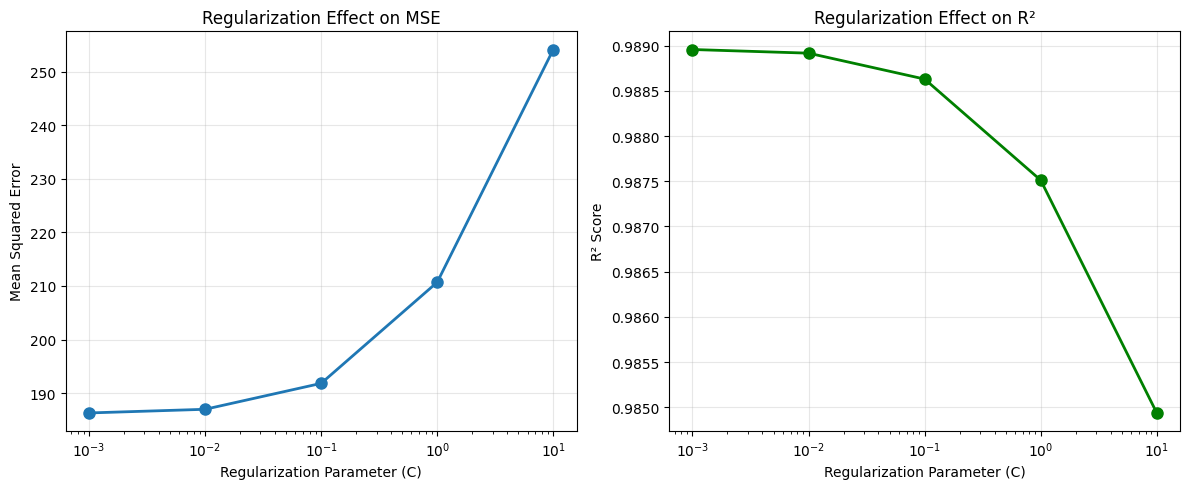

In [5]:
# Test different regularization parameters
regularization_params = [0.001, 0.01, 0.1, 1.0, 10.0]
reg_results = {}

for reg_param in regularization_params:
    elm = ELM(
        n_hidden=200,  # Larger network to see overfitting
        activation='sigmoid',
        random_state=42,
        scale=1.0
    )
    
    # Train with regularization
    start_time = time.time()
    elm.fit(X_train, y_train, regularisation=True, regularisation_param=reg_param)
    training_time = time.time() - start_time
    
    # Evaluate
    y_pred = elm.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    reg_results[reg_param] = {
        'mse': mse,
        'r2': r2,
        'training_time': training_time
    }
    
    print(f"   MSE: {mse:.4f}, R²: {r2:.4f}")

# Plot regularization effects
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

reg_params = list(reg_results.keys())
mse_values = [reg_results[param]['mse'] for param in reg_params]
r2_values = [reg_results[param]['r2'] for param in reg_params]

axes[0].semilogx(reg_params, mse_values, 'o-', linewidth=2, markersize=8)
axes[0].set_xlabel('Regularization Parameter (C)')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('Regularization Effect on MSE')
axes[0].grid(True, alpha=0.3)

axes[1].semilogx(reg_params, r2_values, 'o-', linewidth=2, markersize=8, color='green')
axes[1].set_xlabel('Regularization Parameter (C)')
axes[1].set_ylabel('R² Score')
axes[1].set_title('Regularization Effect on R²')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Testing Incremental ELM...
Test data shape: (100, 5)
Predictions shape: (100,)
Target shape: (100,)
Final hidden neurons: 250
Training time: 0.0437 seconds
MSE: 8.0439
R² Score: 0.9993
Standard ELM - Training time: 0.0009 seconds
Standard ELM - MSE: 109.0455
Standard ELM - R² Score: 0.9908


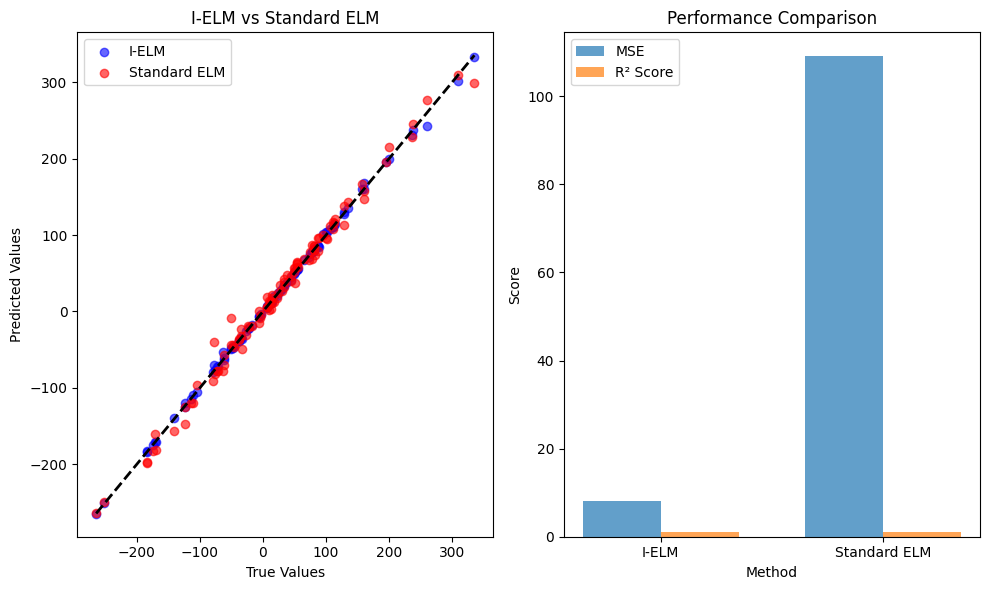

In [ ]:
# 6. Incremental ELM (I-ELM) Example

print("Testing Incremental ELM...")

# Generate data for incremental learning
X_inc, y_inc = make_regression(n_samples=500, n_features=5, noise=0.1, random_state=42)
X_train_inc, X_test_inc, y_train_inc, y_test_inc = train_test_split(
    X_inc, y_inc, test_size=0.2, random_state=42)

# Create Incremental ELM
ielm = ELMIncremental(
    initial_neurons=50,  # Initial number of hidden neurons
    activation='sigmoid',
    random_state=42
)

# Train incrementally
start_time = time.time()
ielm.fit(X_train_inc, y_train_inc)
training_time_ielm = time.time() - start_time

# Make predictions
y_pred_ielm = ielm.predict(X_test_inc)

# Ensure we have the correct shape
print(f"Test data shape: {X_test_inc.shape}")
print(f"Predictions shape: {y_pred_ielm.shape}")
print(f"Target shape: {y_test_inc.shape}")

# Calculate metrics
mse_ielm = mean_squared_error(y_test_inc, y_pred_ielm)
r2_ielm = r2_score(y_test_inc, y_pred_ielm)

print(f"Final hidden neurons: {ielm.n_hidden}")
print(f"Training time: {training_time_ielm:.4f} seconds")
print(f"MSE: {mse_ielm:.4f}")
print(f"R² Score: {r2_ielm:.4f}")

# Compare with standard ELM
elm_std = ELM(n_hidden=50, activation='sigmoid', random_state=42)
start_time = time.time()
elm_std.fit(X_train_inc, y_train_inc)
training_time_std = time.time() - start_time

y_pred_std = elm_std.predict(X_test_inc)

mse_std = mean_squared_error(y_test_inc, y_pred_std)
r2_std = r2_score(y_test_inc, y_pred_std)

print(f"Standard ELM - Training time: {training_time_std:.4f} seconds")
print(f"Standard ELM - MSE: {mse_std:.4f}")
print(f"Standard ELM - R² Score: {r2_std:.4f}")

# Plot comparison
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test_inc, y_pred_ielm, alpha=0.6, label='I-ELM', color='blue')
plt.scatter(y_test_inc, y_pred_std, alpha=0.6, label='Standard ELM', color='red')
plt.plot([y_test_inc.min(), y_test_inc.max()], [y_test_inc.min(), y_test_inc.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('I-ELM vs Standard ELM')
plt.legend()

plt.subplot(1, 2, 2)
methods = ['I-ELM', 'Standard ELM']
mse_values = [mse_ielm, mse_std]
r2_values = [r2_ielm, r2_std]

x = np.arange(len(methods))
width = 0.35

plt.bar(x - width/2, mse_values, width, label='MSE', alpha=0.7)
plt.bar(x + width/2, r2_values, width, label='R² Score', alpha=0.7)
plt.xlabel('Method')
plt.ylabel('Score')
plt.title('Performance Comparison')
plt.xticks(x, methods)
plt.legend()

plt.tight_layout()
plt.show()


## Summary

This notebook demonstrated the core ELM functionality:

### Key Takeaways:

1. **ELM is extremely fast** - Training times are typically under 0.1 seconds for small to medium datasets
2. **Activation functions matter** - Different activations can significantly impact performance
3. **Regularization is crucial** - Proper regularization prevents overfitting
4. **I-ELM provides flexibility** - Incremental learning allows dynamic network growth
5. **Universal approximation** - ELM can handle both regression and classification tasks effectively

### Next Steps:

- Explore the Heston model and analytical pricing methods in Notebook 02
- Learn about the ELM options pricing framework in Notebook 03
- Compare ELM performance with traditional methods in Notebook 04
